# Imports

In [1]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import spacy

nlp = spacy.load("en_core_web_sm")

# Load Data

In [2]:
df = pd.read_csv("../data/servey.tsv", sep="\t")
df.head()

,Timestamp,"What were your honest first impressions of coming across a manga by Tatsuki Fujimoto? Was it CSM or Fire Punch or a one-shot? What did you think of it? Was it cool, dumb, weird, funny, amazing, garbage?"
0,7/4/2022 16:35:30,test
1,7/4/2022 16:37:27,(CSM) It was surreal. It was my first real man...
2,7/4/2022 16:38:32,It was CSM... it was so fast so frenetic and i...
3,7/4/2022 16:39:29,Gay
4,7/4/2022 16:40:15,chainsaw man had me on the verge of ejaculation


In [3]:
adj_count = dict()
for idx, row in df.iterrows():
    doc = nlp(row[-1])
    for token in doc:
        if token.pos_ == "ADJ":
            lemma = token.lemma_
            if lemma in adj_count:
                adj_count[lemma] += 1
            else:
                adj_count[lemma] = 1

In [4]:
top_adj = []
for adj in adj_count:
    max_counts = sorted(adj_count.values())[-10:]
    if adj_count[adj] in max_counts:
        top_adj.append((adj, adj_count[adj]))

In [5]:
top_adj = sorted(top_adj, key=lambda x: x[1])
print("\n".join([f"{a}, {b}" for a, b in top_adj]))

same, 49
more, 66
great, 72
other, 94
weird, 98
cool, 102
chainsaw, 104
amazing, 111
good, 179
first, 286


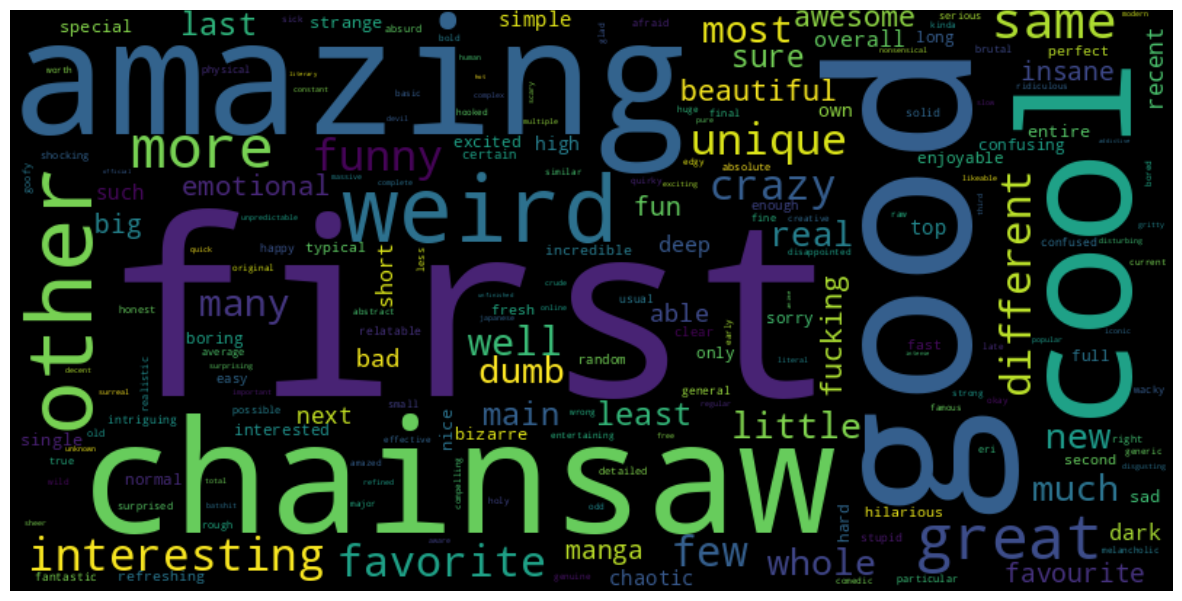

In [6]:
wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(adj_count)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

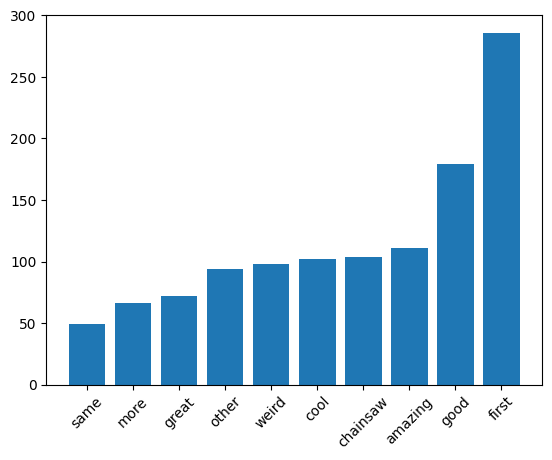

In [7]:
fig, ax = plt.subplots()
ax.bar(range(len(top_adj)), [tup[1] for tup in top_adj])
ax.set_xticks(range(len(top_adj)))
ax.set_xticklabels([tup[0] for tup in top_adj], rotation=45)
plt.show()

# Notes

## Methods
- load takes the name of a prebuilt and installed model
- explain takes a string that spacy returned and explains what it means

## How to make a document
- once you've instatiated your model call it and pass it some text

## Doc attributes
- ents returns a list (possibly generator) of all the entities it deetected

### Ent attributes
- so for token you just loop over teh documents but for ents you loop over teh reult of `doc.ents`
- btw any attribute ending in _ returns a string, most that dont return a number

- text
- label_ what kind of entity


## Token attributes
- i: gives the index. preferred over other indexing
- text
- is_alpha
- is_punct
- like_num
- pos_
- dep_: dependency label?

[spacy](https://course.spacy.io/en/chapter1)

In [9]:
wordcloud.to_file("../imgs/top_adj_worldcloud.jpg")
fig.savefig("../imgs/top_adj_count.jpg")